In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print("Loading CIFAR-10 dataset...") # Step 2: Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0 # Normalize pixel values to range [0, 1]
x_test  = x_test.astype('float32')  / 255.0


In [ ]:
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
# Example: label 3 → [0,0,0,1,0,0,0,0,0,0]

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test,  10)
print(f"Training data shape: {x_train.shape}")   # (50000, 32, 32, 3)
print(f"Test data shape:     {x_test.shape}")    # (10000, 32, 32, 3)


Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


In [ ]:
# Step 3: Define class names (for better visualization)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Step 4: Build a simple CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
      # Output layer – 10 classes
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()   # Print model architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# Step 6: Train the model
print("\nTraining the model...")
history = model.fit(x_train, y_train,
                    epochs=15,               # increase to 30–50 for better results
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)



Training the model...
Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.4071 - loss: 1.9281 - val_accuracy: 0.2205 - val_loss: 2.5998
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6413 - loss: 1.0250 - val_accuracy: 0.6938 - val_loss: 0.8628
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7025 - loss: 0.8482 - val_accuracy: 0.7263 - val_loss: 0.7898
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7390 - loss: 0.7407 - val_accuracy: 0.6860 - val_loss: 0.9625
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7654 - loss: 0.6692 - val_accuracy: 0.7112 - val_loss: 0.8579
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7881 - loss: 0.6042 - val_accuracy: 0.7633 - val_loss: 0.6908
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8051 - loss: 0.5556 - val_accuracy: 0.7845 - val_loss: 0.6209
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8239 -


Test accuracy: 0.8024  (80.24%)


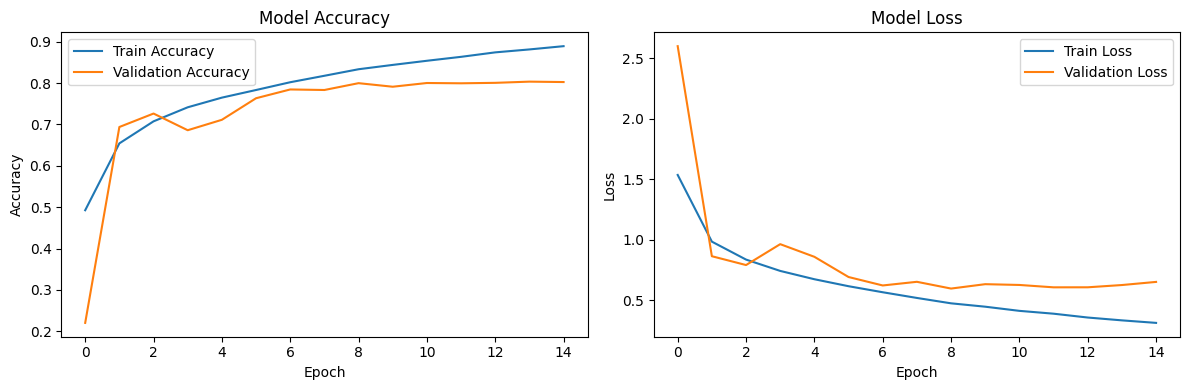

In [ ]:
# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")
# Step 8: Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


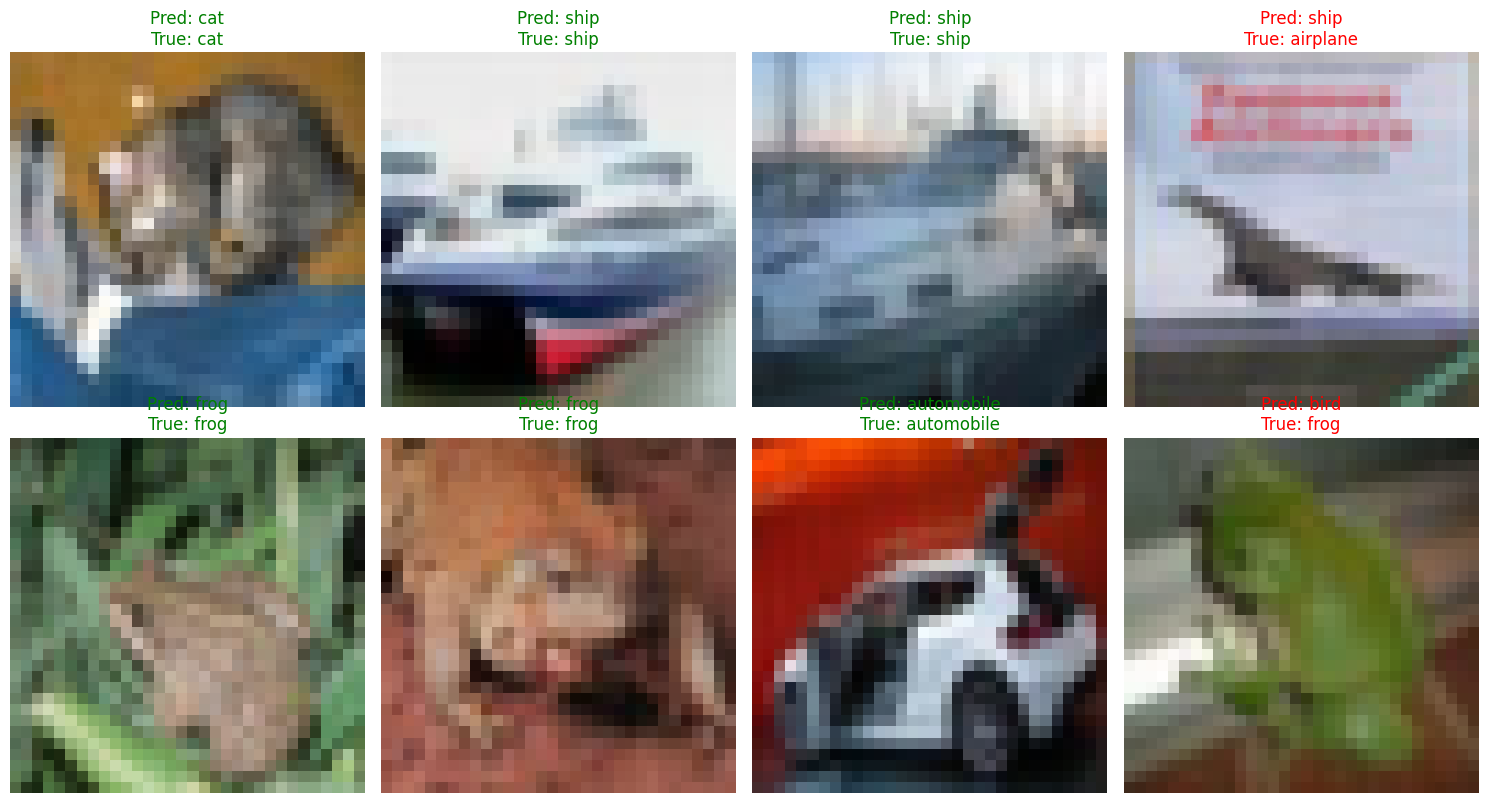

In [ ]:
# Step 9: Make predictions on a few test images (visual check)
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Optional: Save the model
model.save("basic_cifar10_cnn.h5")
print("Practical 1 completed.")


Practical 1 completed.


In [ ]:
# Practical 2: Exploring Transfer Learning with Pre-trained Models
# ------------------------------------------------------------------------------
# Practical 2: Transfer Learning with Pre-trained Model (VGG16)
# Course: Computer Vision
# Objective: Use a pre-trained VGG16 model + fine-tuning on a small custom dataset
# Dataset: Cats vs Dogs (binary classification)
# Tools: TensorFlow 2.x + Keras + pre-trained VGG16


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
import tensorflow as tf
import os

# Update to this URL
_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# Important: Get the directory where it was extracted
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(f"Dataset extracted to: {PATH}")


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Dataset extracted to: /root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
import os

print(os.listdir(os.path.dirname(path_to_zip)))


['cats_and_dogs_extracted', 'cifar-10-batches-py-target', 'cifar-10-batches-py-target_archive', 'cats_and_dogs.zip']


In [ ]:
import os

base_dir = os.path.dirname(path_to_zip)
print("Base directory:", base_dir)
print("Contents:", os.listdir(base_dir))


Base directory: /root/.keras/datasets
Contents: ['cats_and_dogs_extracted', 'cifar-10-batches-py-target', 'cifar-10-batches-py-target_archive', 'cats_and_dogs.zip']


In [ ]:
import os

PATH = "/root/.keras/datasets/cats_and_dogs_extracted"
print("PATH is now:", PATH)


PATH is now: /root/.keras/datasets/cats_and_dogs_extracted


In [ ]:
import os

print("Inside PATH:", os.listdir(PATH))



Inside PATH: ['cats_and_dogs_filtered']


In [ ]:
PATH = "/root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered"
print("Correct PATH:", PATH)


Correct PATH: /root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered


In [ ]:
print(os.listdir(PATH))


['vectorize.py', 'validation', 'train']


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

print("Train folders:", os.listdir(train_dir))
print("Validation folders:", os.listdir(validation_dir))


Train folders: ['dogs', 'cats']
Validation folders: ['dogs', 'cats']


In [ ]:
# Classes
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(f"Training cats: {len(os.listdir(train_cats_dir))}")
print(f"Training dogs: {len(os.listdir(train_dogs_dir))}")


Training cats: 1000
Training dogs: 1000


In [ ]:
# Step 3: Create data generators with augmentation
IMG_SIZE = (160, 160)          # VGG16 usually expects 224×224, but 160 is faster for demo
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Step 4: Load pre-trained VGG16 (without top classification layers)
base_model = VGG16(weights='imagenet',
                   include_top=False,           # remove final dense layers
                   input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
# Freeze the base model (very important in transfer learning)
base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 5: Build our new model on top of VGG16
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),          # better than Flatten for conv base
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')     # binary classification → sigmoid
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Step 6: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
import os

PATH = "/root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered"
print("PATH:", PATH)
print("Inside PATH:", os.listdir(PATH))


PATH: /root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered
Inside PATH: ['vectorize.py', 'validation', 'train']


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

print("Train folders:", os.listdir(train_dir))
print("Validation folders:", os.listdir(validation_dir))


Train folders: ['dogs', 'cats']
Validation folders: ['dogs', 'cats']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (160, 160)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history_phase1 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 460ms/step - accuracy: 0.6041 - loss: 0.6644 - val_accuracy: 0.7940 - val_loss: 0.4298
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.8054 - loss: 0.4311 - val_accuracy: 0.8420 - val_loss: 0.3420
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.8207 - loss: 0.3992 - val_accuracy: 0.8630 - val_loss: 0.3000
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.8524 - loss: 0.3342 - val_accuracy: 0.8720 - val_loss: 0.2911
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.8597 - loss: 0.3310 - val_accuracy: 0.8700 - val_loss: 0.2865
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.8363 - loss: 0.3375 - val_accuracy: 0.8750 - val_loss: 0.2727
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.8713 - loss: 0.3058 - val_accuracy: 0.8790 - val_loss: 0.2685
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.8757 - loss: 0.2834 - val_accu

In [ ]:
import tensorflow as tf
# Step 8: Unfreeze some layers and fine-tune (optional Phase 2)
print("\nUnfreezing last few conv blocks for fine-tuning...")
base_model.trainable = True
# Freeze all layers except the last 4 blocks (example)
for layer in base_model.layers[:-16]:
    layer.trainable = False
# Re-compile with lower learning rate (very important!)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Phase 2: Fine-tuning...")
history_phase2 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)



Unfreezing last few conv blocks for fine-tuning...
Phase 2: Fine-tuning...
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 580ms/step - accuracy: 0.9020 - loss: 0.2433 - val_accuracy: 0.9450 - val_loss: 0.1416
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 357ms/step - accuracy: 0.9501 - loss: 0.1244 - val_accuracy: 0.9430 - val_loss: 0.1576
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 354ms/step - accuracy: 0.9554 - loss: 0.1111 - val_accuracy: 0.9510 - val_loss: 0.1313
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 365ms/step - accuracy: 0.9686 - loss: 0.0776 - val_accuracy: 0.9640 - val_loss: 0.1056
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.9701 - loss: 0.0771 - val_accuracy: 0.9600 - val_loss: 0.1086
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.9867 - loss: 0.0446 - val_accuracy: 0.9630 - val_loss: 0.1106
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.9875 - loss: 0.0285 - val_accuracy: 0.9640 - val_loss: 0.1123
Epoch 8/10
63/63 ━━━━

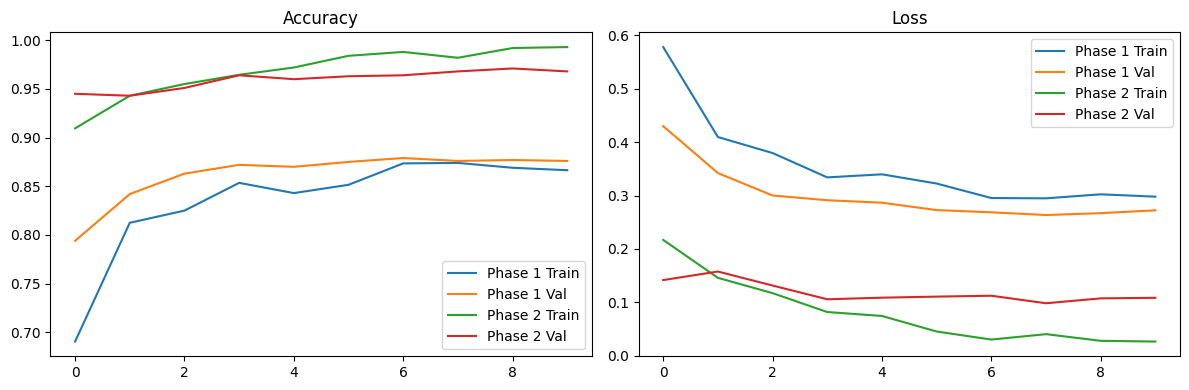

In [ ]:
import matplotlib.pyplot as plt

# Step 9: Plot training history
def plot_history(histories, titles):
    plt.figure(figsize=(12, 4))
    for i, hist in enumerate(histories):
        plt.subplot(1, 2, 1)
        plt.plot(hist.history['accuracy'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_accuracy'], label=f'{titles[i]} Val')
        plt.title('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(hist.history['loss'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_loss'], label=f'{titles[i]} Val')
        plt.title('Loss')
        plt.legend()
    plt.tight_layout()
    plt.show()
plot_history([history_phase1, history_phase2], ['Phase 1', 'Phase 2'])


In [ ]:
# Step 10: Evaluate final model
loss, acc = model.evaluate(validation_generator, verbose=0)
print(f"\nFinal validation accuracy: {acc:.4f} ({acc*100:.2f}%)")
# Optional: Save model
model.save("vgg16_cats_dogs_transfer.h5")
print("Practical 2 completed.")



Final validation accuracy: 0.9680 (96.80%)
Practical 2 completed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get one batch from validation generator
images, labels = next(validation_generator)


In [ ]:
predictions = model.predict(images)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [ ]:
class_names = ['Cat', 'Dog']


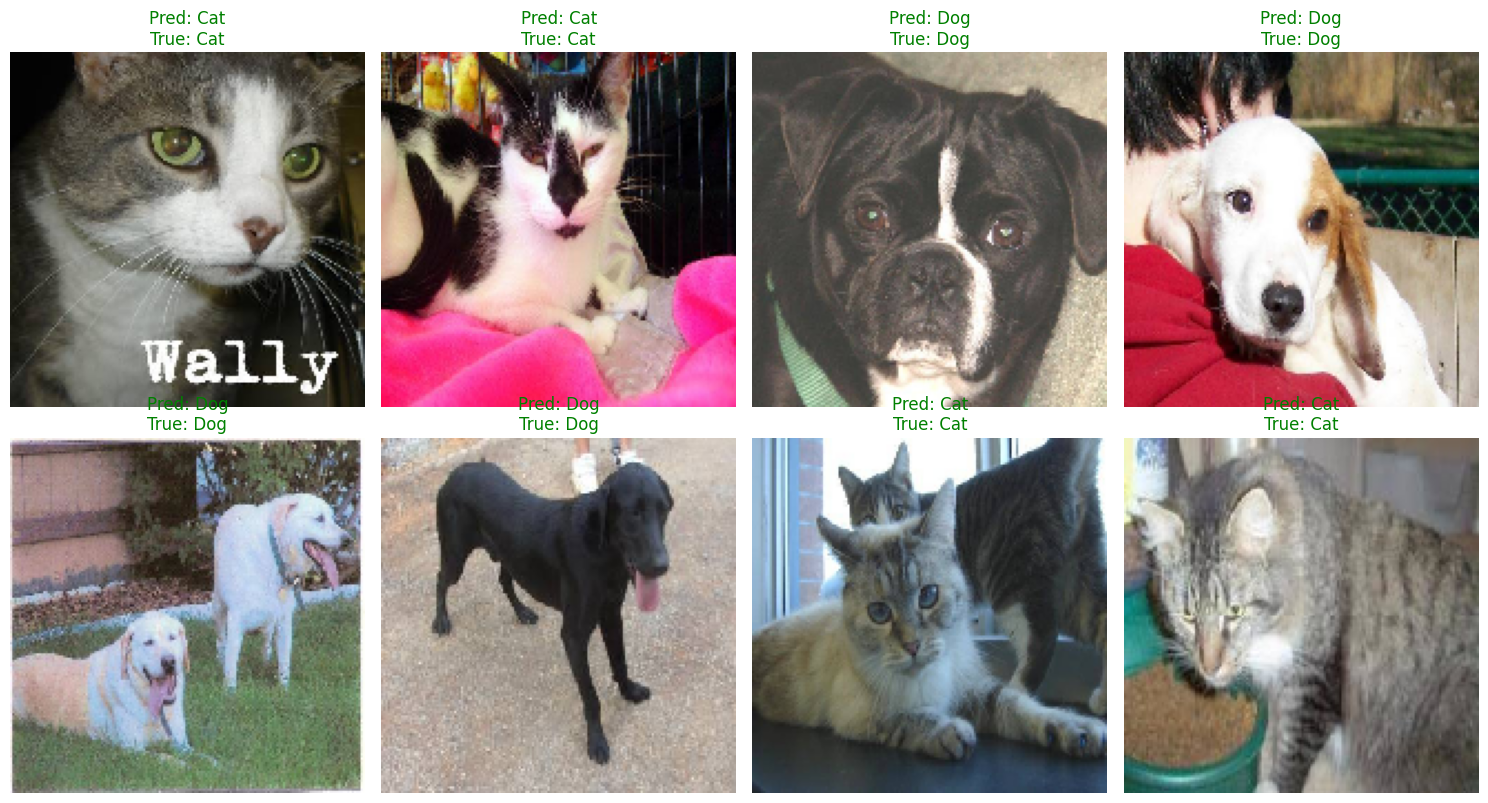

In [ ]:
num_images = 8
plt.figure(figsize=(15, 8))

for i in range(num_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

    true_label = class_names[int(labels[i])]
    pred_label = class_names[int(predicted_classes[i])]

    color = "green" if true_label == pred_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
